In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-14 23:37:38.817623: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 23:37:39.294870: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 23:37:40.478917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

In [3]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [4]:
input_shape = X_train.shape[1:]
input_shape

(646, 40, 1)

In [5]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

model.summary()

/home/ntran4869/miniconda3/envs/audioclass/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-14 23:37:44.735424: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:37:44.933342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:37:44.933721: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/00

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 644, 38, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 642, 36, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 321, 18, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 321, 18, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 319, 16, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 160, 8, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 8, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 159, 7, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 80, 4, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 4, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 80, 4, 16)      │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 40, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 2, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234,138 (914.60 KB)

 Trainable params: 233,850 (913.48 KB)

 Non-trainable params: 288 (1.12 KB)

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= Adam(learning_rate=1e-4), metrics=['accuracy'])

In [7]:
es = EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss")

In [8]:
hist = model.fit(X_train, Y_train,
                 validation_data = (X_test,Y_test),
                 epochs = 100,
                 batch_size = 32,
                 callbacks = [es]
                 )

Epoch 1/100


I0000 00:00:1715722670.516476   20066 service.cc:145] XLA service 0x7f6a580164b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715722670.516570   20066 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-05-14 23:37:50.607294: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-14 23:37:50.995385: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8901


  1/313 ━━━━━━━━━━━━━━━━━━━━ 1:21:18 16s/step - accuracy: 0.1562 - loss: 3.2355

I0000 00:00:1715722683.930875   20066 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 71ms/step - accuracy: 0.2454 - loss: 2.2832 - val_accuracy: 0.5000 - val_loss: 1.4586
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.4571 - loss: 1.4954 - val_accuracy: 0.6325 - val_loss: 1.0571
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.5740 - loss: 1.2094 - val_accuracy: 0.6940 - val_loss: 0.9057
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6408 - loss: 1.0212 - val_accuracy: 0.7475 - val_loss: 0.7696
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6830 - loss: 0.9050 - val_accuracy: 0.7620 - val_loss: 0.7150
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7257 - loss: 0.7922 - val_accuracy: 0.8095 - val_loss: 0.5654
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7639 - loss: 0.6760 - val_accuracy: 0.8200 - val_loss: 0.5346
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7824 - loss: 0.6212 - val_

In [9]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 2000x1500 with 0 Axes>

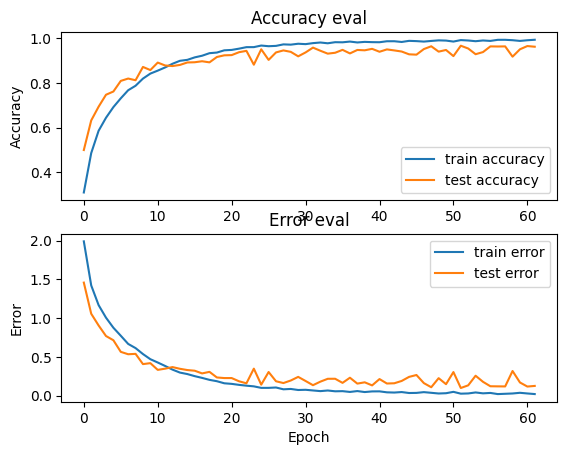

In [10]:
plot_history(hist)

In [11]:
test_error, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9686 - loss: 0.0982
Test accuracy: 0.9670000076293945


In [12]:
model.save('my_model.keras')

Evaluate on test set

In [13]:
X_val = np.load('X_val.npy')
Y_val = np.load('Y_val.npy')

In [14]:
X_val = X_val[..., np.newaxis]

In [15]:
test_error, test_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Test accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3090 - loss: 7.3347
Test accuracy: 0.2980000078678131
